In [ ]:
import numpy as np
import csv

In [ ]:
def label_mem(rand_arr, rand_lab, i):

    index = i % rand_arr.shape[0]
    rand_arr[index] = rand_lab
    print("np.all: ", np.all(rand_arr == rand_arr[0, :], axis=0))
    return rand_arr, np.all(rand_arr == rand_arr[0, :], axis=0)

In [ ]:
def MemLPA (adjacency_matrix: np.ndarray):
    n_nodes = adjacency_matrix.shape[0]
    labels = np.zeros(n_nodes)
    mem = {}
    for i in range(n_nodes):
        labels[i] = i  # inititalize labels of all nodes with the node number itself
        mem[i] = {}  # mem is a dict of dicts storing score of each comm label for each node
    print("Initial Labels", labels)
    AL = np.array([False]*n_nodes)
    label_history = np.random.randn(3, n_nodes)  # init
    n_iteration = 0
    print("Initial Memory", mem)

    while any(AL == False):
        for node, is_active in enumerate(AL):
              if not is_active:
                # Collect neighbors' labels:
                neighbor_labels = {}  # maps the community labels and their scored assigned for the given node
                for neighbor, edge in enumerate(adjacency_matrix[node,:]):
                    #print("Neigh", neighbor)
                    #print("Edge", edge)
                    # Update node's Memory:
                    if (edge != 0):
                        if mem[node].get(labels[neighbor]) == None:  # if scoreboard of node doesn't have a particular community label
                            mem[node][labels[neighbor]] = edge  # create that label & init it with the current edge weight
                        else:
                            mem[node][labels[neighbor]] += edge  # else, add current weight to the existing score

                # Prune node's memory <TODO>

        # Label with maximum score in memory becomes new label:
        for node, is_active in enumerate(AL):
            if not is_active:
                labels[node] = int(max(mem[node], key=mem[node].get))  # get the key with max value in dictionary

        # Update active list:
        print("Memory")
        for itr in range(n_nodes):
          for itr2 in range(n_nodes):
            if mem[itr].get(itr2) != None:
              print(f'{mem[itr][itr2]:.5f}', end=" ")
            else:
              print("0.00000", end=" ")
          print()
        print("Labels",labels)
        label_history, AL = label_mem(label_history, labels, n_iteration)
        print("End of Iternation #", n_iteration)
        print(".............................................")
        x = input()
        #print("Label History", label_history)
        #print("Acit vlist", AL)
        n_iteration += 1
        ret_labels = labels
        #print(labels)
    print(ret_labels)
    return ret_labels

In [ ]:
adj_mat = [[0, 1, 0.7, 0, 0, 0],
           [1, 0, 0.8, 0, 0, 0],
           [0.7, 0.8, 0, 0.3, 0, 0],
           [0, 0, 0.3, 0, 0.7, 0.8],
           [0, 0, 0, 0.7, 0, 0.9],
           [0, 0, 0, 0.8, 0.9, 0]]
adj_mat = np.array(adj_mat)
MemLPA(adj_mat)

Initial Labels [0. 1. 2. 3. 4. 5.]
Initial Memory {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}}
Memory
0.00 1.00 0.70 0.00 0.00 0.00 
1.00 0.00 0.80 0.00 0.00 0.00 
0.70 0.80 0.00 0.30 0.00 0.00 
0.00 0.00 0.30 0.00 0.70 0.80 
0.00 0.00 0.00 0.70 0.00 0.90 
0.00 0.00 0.00 0.80 0.90 0.00 
Labels [1. 0. 1. 5. 5. 4.]
np.all:  [False False False False False False]
End of Iternation # 0
.............................................
1
Memory
1.00 1.70 0.70 0.00 0.00 0.00 
1.00 1.80 0.80 0.00 0.00 0.00 
1.50 1.50 0.00 0.30 0.00 0.30 
0.00 0.30 0.30 0.00 1.50 1.50 
0.00 0.00 0.00 0.70 0.90 1.60 
0.00 0.00 0.00 0.80 0.90 1.70 
Labels [1. 1. 0. 4. 5. 5.]
np.all:  [False False False False False False]
End of Iternation # 1
.............................................
1
Memory
1.70 2.70 0.70 0.00 0.00 0.00 
1.80 2.80 0.80 0.00 0.00 0.00 
1.50 3.00 0.00 0.30 0.30 0.30 
0.30 0.30 0.30 0.00 1.50 3.00 
0.00 0.00 0.00 0.70 1.60 2.50 
0.00 0.00 0.00 0.80 1.70 2.60 
Labels [1. 1. 1. 5. 5. 5.]
np.all:  [ Tr

array([1., 1., 1., 5., 5., 5.])

In [ ]:
def matrix_conversion(adj_mat):
  connected_matrix = np.zeros_like(adj_mat)
  for i in range(adj_mat.shape[0]):
    for j in range(adj_mat.shape[1]):
      if adj_mat[i][j] > 0:
        connected_matrix[i][j] = 1
      else:
        connected_matrix[i][j] = 0

  return connected_matrix

In [ ]:
def triangle_count(adj_mat):
  neb_values = np.zeros_like(adj_mat)
  for i in range(adj_mat.shape[0]):
    for j in range(adj_mat.shape[0]):
      triangle_count = 0
      if not i == j:
        if adj_mat[i][j] == 1:
          triangle_count = 1
          for z in range(adj_mat.shape[0]):
            if z == i or z == j:
              pass
            else:
              if adj_mat[i][z] == 1 and adj_mat[j][z] == 1:
                triangle_count += 1

      neb_values[i][j] = triangle_count

  return neb_values

In [ ]:
def nb_frac (adj_mat, tri_mat):
  nb_mat = np.zeros_like(adj_mat)
  sum_mat = np.sum(adj_mat, axis=1)
  #print(sum_mat)
  for i in range(tri_mat.shape[0]):
    denominator = sum_mat[i]
    # row score
    for j in range(tri_mat.shape[0]):
      nb_mat[i][j] = tri_mat[i][j] / denominator

  #pass
  return nb_mat

In [ ]:
def label_2_list(new_labels):
  label = new_labels[0]
  label_bucket = []
  new_label = []
  new_label.append(0)
  visited = []
  for z in range(len(new_labels)):
    new_label = []
    for x in range(0, len(new_labels)):
      # get a label
      if new_labels[x] == z and x not in visited:
        new_label.append(x)
        visited.append(x)
      pass
    if len(new_label) > 0:
      label_bucket.append(new_label)

  return label_bucket

##Reading karate club dataset

In [ ]:
with open('/content/karate-club.txt', 'r') as f:
    lines = f.readlines()

adj_matrix = np.zeros((34, 34))

for x in lines:
  line = x.split()
  src = int(line[0]) - 1
  trg = int(line[1]) - 1
  adj_matrix[src][trg] = 1
  adj_matrix[trg][src] = 1

print(adj_matrix)

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [ ]:
for z in adj_matrix:
  for j in z:
    print(int(j), end=" ")
  print()

0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 
1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 
1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 
1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 
1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## BASIC MemLPA (NoNeighbourhood Count)

In [ ]:
new_labels = MemLPA(adj_matrix)

Initial Labels [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]
Initial Memory {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {}, 33: {}}
Memory
0.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 0.00 1.00 1.00 1.00 1.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 
1.00 0.00 1.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 
1.00 1.00 0.00 1.00 0.00 0.00 0.00 1.00 1.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 1.00 0.00 
1.00 1.00 1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.0

In [ ]:
label_bucket = label_2_list(new_labels)

In [ ]:
data = label_bucket

with open('memlpa_basic.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerows(data)

## MemLPA (Neighbourhood Count Addition)

In [ ]:
tri_values = triangle_count(adj_matrix)
nb_matrix = nb_frac(adj_matrix, tri_values)

In [ ]:
modified_mat = np.add(adj_matrix, nb_matrix)

In [ ]:
new_labels = MemLPA(modified_mat)

Initial Labels [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]
Initial Memory {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {}, 33: {}}
Memory
0.00 1.50 1.38 1.38 1.19 1.19 1.19 1.25 1.12 0.00 1.19 1.06 1.12 1.25 0.00 0.00 0.00 1.12 0.00 1.12 0.00 1.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.06 0.00 0.00 
1.89 0.00 1.56 1.56 0.00 0.00 0.00 1.44 0.00 0.00 0.00 0.00 0.00 1.44 0.00 0.00 0.00 1.22 0.00 1.22 0.00 1.22 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.11 0.00 0.00 0.00 
1.60 1.50 0.00 1.50 0.00 0.00 0.00 1.40 1.30 1.10 0.00 0.00 0.00 1.40 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.10 1.10 0.00 0.00 0.00 1.20 0.00 
2.00 1.83 1.83 0.00 0.00 0.00 0.00 1.67 0.00 0.0

In [ ]:
label_bucket = label_2_list(new_labels)

In [ ]:
data = label_bucket

with open('memlpa_neighbour_add.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerows(data)

## MemLPA (Neighbourhood Count Multiplication)

In [ ]:
modified_mat = np.multiply(adj_matrix, nb_matrix)

In [ ]:
modified_mat

array([[0.        , 0.5       , 0.375     , ..., 0.0625    , 0.        ,
        0.        ],
       [0.88888889, 0.        , 0.55555556, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.5       , 0.        , ..., 0.        , 0.2       ,
        0.        ],
       ...,
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 0.        , 0.16666667, ..., 0.16666667, 0.        ,
        0.91666667],
       [0.        , 0.        , 0.        , ..., 0.17647059, 0.64705882,
        0.        ]])

In [ ]:
np.savetxt("foo.csv", modified_mat, delimiter=",")

In [ ]:
new_labels = MemLPA(modified_mat)

Initial Labels [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]
Initial Memory {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {}, 33: {}}
Memory
0.00000 0.50000 0.37500 0.37500 0.18750 0.18750 0.18750 0.25000 0.12500 0.00000 0.18750 0.06250 0.12500 0.25000 0.00000 0.00000 0.00000 0.12500 0.00000 0.12500 0.00000 0.12500 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.06250 0.00000 0.00000 
0.88889 0.00000 0.55556 0.55556 0.00000 0.00000 0.00000 0.44444 0.00000 0.00000 0.00000 0.00000 0.00000 0.44444 0.00000 0.00000 0.00000 0.22222 0.00000 0.22222 0.00000 0.22222 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.11111 0.00000 0.00000 0.00000 
0.60000 0.50000

KeyboardInterrupt: ignored

In [ ]:
label_bucket = label_2_list(new_labels)

In [ ]:
data = label_bucket

with open('memlpa_neighbour_mul.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerows(data)

## Evaluation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.6/228.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.3 MB/s eta 0:00:00
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395118 sha256=047edb6929516cd77b45df04eb2b5851e51a40e6b4427d7b4454abb573bd14e7
  Stored in directory: /root/.cache/pip/wheels/e0/56/c2/abb6866a3fcd8a55862f1df8a18f57805c3a7

In [ ]:
import cdlib

In [ ]:
from cdlib import algorithms, readwrite, evaluation

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap', 'karateclub', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'leidenalg'}


In [ ]:
coms_gt = readwrite.read_community_csv("/content/gt.txt", ",", int)

In [ ]:
coms_memlpa_basic = readwrite.read_community_csv("/content/memlpa_basic.csv", ",", int)

In [ ]:
coms_memlpa_neighbour_add = readwrite.read_community_csv("/content/memlpa_nn_cupy.csv", ",", int)

In [ ]:
coms_memlpa_neighbour_mul = readwrite.read_community_csv("/content/memlpa_neighhood.csv", ",", int)

In [ ]:
coms_gt.normalized_mutual_information(coms_gt)

MatchingResult(score=1.0, std=None)

In [ ]:
coms_gt.normalized_mutual_information(coms_memlpa_basic)

MatchingResult(score=0.4916391188669452, std=None)

In [ ]:
coms_gt.normalized_mutual_information(coms_memlpa_neighbour_add)

MatchingResult(score=0.7403317189846191, std=None)

In [ ]:
coms_gt.normalized_mutual_information(coms_memlpa_neighbour_mul)

MatchingResult(score=0.4916391188669452, std=None)

In [ ]:
import networkx as nx

g = nx.karate_club_graph()

In [ ]:
lp_coms = algorithms.label_propagation(g)

In [ ]:
coms_gt.normalized_mutual_information(lp_coms)

MatchingResult(score=0.44484837937442334, std=None)

## Visualization of Results

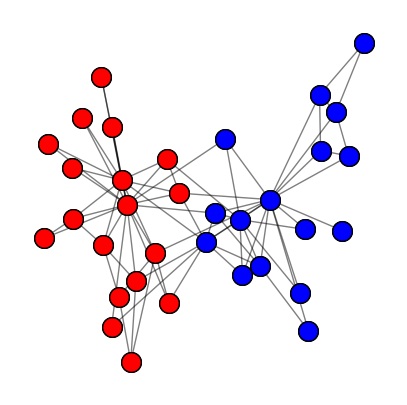

In [ ]:
from cdlib import viz

pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms_gt, pos, figsize=(5, 5))

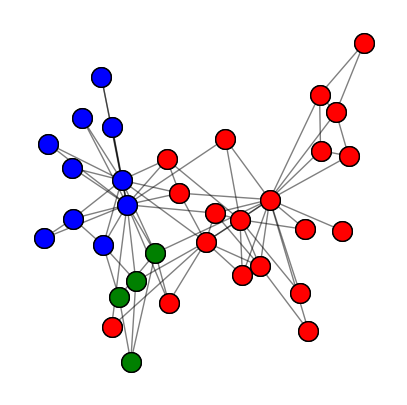

In [ ]:
viz.plot_network_clusters(g, coms_memlpa_basic, pos, figsize=(5, 5))

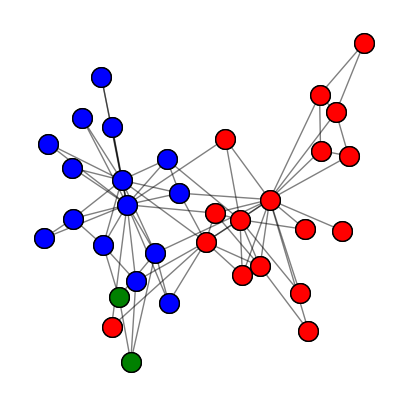

In [ ]:
viz.plot_network_clusters(g, coms_memlpa_neighbour_add, pos, figsize=(5, 5))

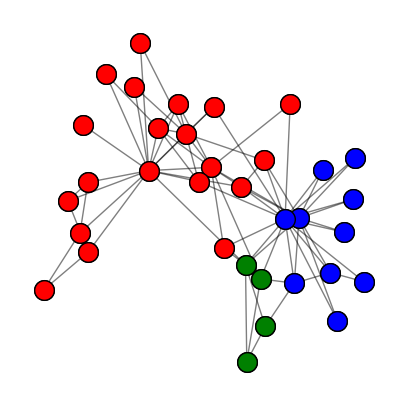

In [ ]:
viz.plot_network_clusters(g, coms_memlpa_neighbour_mul, pos, figsize=(5, 5))

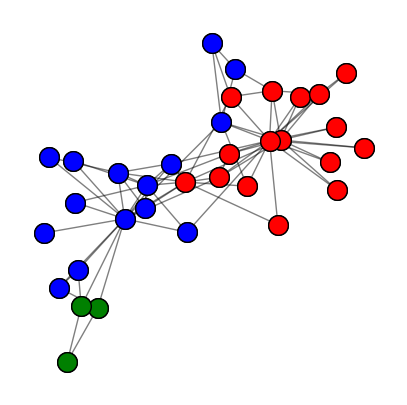

In [ ]:
viz.plot_network_clusters(g, lp_coms, pos, figsize=(5, 5))

TO DO:

Pruning \
Neighbor overlap  [DONE]\
Tie breaker : Label Selection (if multiple maximums exist) [DONE, but need to verify] \
Singeton community handling \
Parallelization